<a href="https://colab.research.google.com/github/VirenS13117/Deep-Dictionary-Learning/blob/master/Adaboost_tutorial_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center"><font color='red'> AdaBoost Guide for Beginners</font></h1>


<h2><font color='blue'> Introduction</font></h2>


Machine learning is all around us. Over the years, machine learning has penerated in our daily lives, whether it is weather prediction or recommending new movies/videos on Netflix/Youtube, Machine Learning is omnipresent. We are using it without even realising it. And as a data scientist, we would not want these machine learning models to be weak learners. Instead, we would want them to be strong and make accurate predictions. And, sometimes, inorder to achieve this, we end up making the Machine Learning model very complex. \\
Can we make strong models without making the model too complex? Yes, we can. In this tutorial we will talk about one of the famous techniques to do this - **Adaptive Boosting** or what it is popularly called as **AdaBoost**.  Adaboost is a powerful tool that can improve the performance of any exisiting machine learning algorithm. And more importantly, it is can do this without increasing the complexity of the model significantly. AdaBoost falls under the cateogary of ensembling techniques and can boost the performance of our machine learning models. Therefore, it is a must have skill for a data scientist!

First things first. Let's start from what is ensembling? Well,  in this tutorial, we will discuss high level idea of ensembling and then dicuss in depth about AdaBoost. We will learn the algorithm for AdaBoost, the mathematics behind it and also implement it using numpy. Towards the end, we will also implement AdaBoost classifier using sklearn library. The tutorial is divided into the following subsections: \\


1.   Ensembling
2.   AdaBoost
3.   Decision Stumps
4.   Algorithm
5.   Mathematics behind Adaboost
6.   Implementing AdaBoost from scratch using numpy
7.   Implementing AdaBoost using sklearn
8.   Additional Resources


So, let's get started!

<h2><font color='blue'> Ensembling</font></h2>


 In ensembling, the key idea is "diversity". Ensembling is a technique that uses a set of weak classifiers and combines them to make a strong classifier. Can we learn weak models on different parts of the feature space and combine them to form a classifier which has better overall performance on the entire feature space? Ensembling does exactly this. It combines the decisions from multiple models to improve the overall performance. A weak model  can be as simple as a classifier which is just better than random guessing. There are 3 types of ensembling techniques: \\
1) Bagging \\
2) Boosting \\
3) Stacking \\
In this tutorial, we will focus on AdaBoost which comes under Boosting. Let's first understand the Boosting and then we can dive deeper into the AdaBoost.

<figure>
<center>
<img src='https://drive.google.com/uc?id=1IVI-k7qd1G-Rcdfhy1D2CxfAJaMx8j2R' />
</center>
</figure>

<h2><font color='blue'> Boosting</font></h2>


We all make mistakes and we learn from them. We avoid making the same mistakes again, similarly boosting algorithm tries to build a strong machine learning model by sequentially learning from the mistakes of previous weak learners. In boosting, we add a model at each step where the newly added model corrects the mistakes of the previous models. The newly added model makes correct predictions for the points which were misclassified by previous classifiers. We keep adding classifiers until the entire training data is correctly classified.

Types of Boosting Algorithms: \\
1) AdaBoost (Adaptive Boosting) \\
2) Gradient Tree Boosting \\
3) XGBoost \\



<figure>
<center>
<img src='https://drive.google.com/uc?id=1_lyd2lajLiRN5pp5fD7cUacvwUWInoC6' />
</center>
</figure>

<h2><font color='blue'> AdaBoost</font></h2>


AdaBoost (Adaptive Boosting) is one of the most famous boosting technique therefore the basic principle is same i.e. combining multiple weak classifiers to build one strong classifier. AdaBoost was first introduced in the paper titled 'A Short Introduction to Boosting' by Yoav Freund and Robert Schapire.

An individual classifier may not be good at accurately predicting the class label for an input. But when we progressively combine multiple weak classifiers where each new weak learner learns progressively from the mistakes of the previous models, we end up building a strong model. The classifier mentioned here could be any of your basic classifiers like Decision Trees, SVM or Logistic Regression etc.

Now, what do we mean by a "weak" classifier? Any classifier better than random can be considered as a weak classifier. Even though it better than random but its performance is poor. For example, a weak classifier has an accuracy of 51% which is better than random and it will misclasssify points 49% of time. A weak classifier is simple and less prone to overfitting. 

AdaBoost is not a model in itself. Rather it can be applied on top of any classifier to learn from its shortcomings and propose a more accurate model.

How does it work? \\
On high level, AdaBoost does the following: \\
- AdaBoost assigns weights to all the data points in the training dataset. Initially, all the data points have the same weight \\
w = 1/length(training_data).
- We create a weak classifier like a decision stump. All the data points, which are correctly classified by this stump, AdaBost decreases their weights. On the other hand, the data points which were misclassified, their weight is increased so that the next weak classifier focuses more on the misclassified points. \\
 

We discuss this algorithm in more details in the following sections. Before, we proceed, let's look at decision stumps as we will be using them for creating an AdaBoost.

<h2><font color='blue'> Decision Stumps</font></h2>

In this tuorial, we will apply AdaBoost on Decision Stumps. Decision Stumps are trees with only one level, they are not "fully grown" trees. They have 1 node and 2 leaves. In the image below, we show a decision stump based on Temperature T, if T is less than 30, it is classified as cold else hot. We will use AdaBoost technique to combine multiple stumps(weak classifiers) to create a strong classifier.

A full grown tree is prone to overfitting. Stumps are simple and have high bias. A single stump is generally not a good classifier. A stump uses one variable to make a decision. The image shown below is an example of a decision stump-they can be as simple as vertical or horizontal lines.

<figure>
<center>
<img src='https://drive.google.com/uc?export=view&id=1r2ku47o8WvrlsQXSn0ERVizIdxgcjRAB' />
<figcaption>Decision Stump</figcaption></center>
</figure>

So, decision stumps can be considered as horizontal or vertical lines separating the data as shown below.

<figure>
<center>
<img src='https://drive.google.com/uc?id=1XQob2BDRxzeiXI9eJf4_oVfiYsqoiRqj' />
<figcaption>Vertical Decision Stump</figcaption></center>
</figure>

<figure>
<center>
<img src='https://drive.google.com/uc?id=1jAYJvz7fCvtoQoxFEr7i_pjXnjwgyi-P' />
<figcaption>Horizontal Decision Stump</figcaption></center>
</figure>

Now, we are ready to go through the actual AdaBoost algorithm. Let's dive in!

<h2><font color='blue'> Algorithm</font></h2>


AdaBoost assigns weight to each data point in our training data. Initially, all the data points have the same weight i.e. weights have uniform distribution. 
- In the first step, AdaBoost creates a weak classifier (it can be SVM, decision tree, logistic regression or any classifier).The error $\epsilon$ of that classifier is given by sum (weights of incorrectly classified data points). So, AdaBoost assigns weight or vote to every classifier it creates. By vote we mean, what will be the weight and contribution of this weak classifier in the over all classifier. \\
The vote value : $\beta$ = (1/2) log((1-$\epsilon$)/$\epsilon$).
- AdaBoost stores this weak classifier and it's vote.
- In the next step, AdaBoost updates the weights of each data point in the training data. So, all the data points which were correctly classified by the previous weak classifier --> their weights are decreased. On the other hand, the data points which were incorrectly classified, their weight is increased. This encourages the next weak classifier to favour correct classifiaction of these missclassified points. This in turn encourages diversity.
- The weights are normalized to ensure that weight of every data point is between 0 to 1.
- Algorithm goes back to step 1

After collecting enough classifiers and their corresponding vote, our AdaBoost classifier is ready. At test time, given a data point, the AdaBoost classifies based on:
> ypred(T) = $\sum$($\beta_{t}$ * $h_{t}$(x))

That's it! You know how AdaBoost works. More, formally, the pseudo code of the entire algorithm is shown in the next section. 


<h2><font color='blue'> Mathematics behind AdaBoost</font></h2>

To understand the mathematics behind Adaboost, let's look at the algorithm proposed by the inventors of this algorithm, Freud and Scharpire.

<figure>
<center>
<img src='https://drive.google.com/uc?id=104zPRMespmC-0U0nK5uR6DWHgDqn6Oc-' />
</center>
</figure>

The daigram below also shows the pipeline of AdaBoost

<figure>
<center>
<img src='https://drive.google.com/uc?id=1rAG7rtfjumoJZBF1lt6Y7AW6sLHiEQ5m' />
<figcaption></figcaption></center>
</figure>

<h2><font color='blue'> Implementation </font></h2>

Let's now dive into the implementation! In this section, we will create an AdaBoost classifier on a small dataset. We will be using decision stumps as the weak classifiers. We will first load the data set. Since, we do not have any hyperparmater to tune, we do not have validation data for this problem. We will use train data to train our Adaboost classifier and then test it on the testing data set. We will observe the accuracy of the test data as training progresses.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from numpy import linalg as LA
from sklearn.metrics import accuracy_score

Let's download the data set by running the following cell.

In [ ]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1RNzPW24yNfgaBq51Zwa6tHeLGlhANY83' -O "train_adaboost.csv"
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=13o02PNdaHEu7pRyrP0BWxntPSt6o97Sx' -O "test_adaboost.csv"

--2021-04-08 02:04:20--  https://docs.google.com/uc?export=download&id=1RNzPW24yNfgaBq51Zwa6tHeLGlhANY83
Resolving docs.google.com (docs.google.com)... 108.177.97.138, 108.177.97.100, 108.177.97.113, ...
Connecting to docs.google.com (docs.google.com)|108.177.97.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-14-30-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/bpuhubvp6df5pbu7g3su6rv6246cfk4t/1617847425000/12811370926114128046/*/1RNzPW24yNfgaBq51Zwa6tHeLGlhANY83?e=download [following]
--2021-04-08 02:04:21--  https://doc-14-30-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/bpuhubvp6df5pbu7g3su6rv6246cfk4t/1617847425000/12811370926114128046/*/1RNzPW24yNfgaBq51Zwa6tHeLGlhANY83?e=download
Resolving doc-14-30-docs.googleusercontent.com (doc-14-30-docs.googleusercontent.com)... 108.177.125.132, 2404:6800:4008:c01::84
Connecting to doc-14-30-docs.googleusercontent.com (doc-14-30-

We will first load the dataset using pandas and then see the first few lines of the datatset to get an idea about the datatset.

In [ ]:
complete_train = pd.read_csv('/content/train_adaboost.csv')
complete_test = pd.read_csv('/content/test_adaboost.csv')

In [ ]:
complete_train.head()

,x1,x2,label
0,-0.479882,0.153095,-1
1,-1.810900,0.707024,1
2,-1.105759,-1.588925,1
3,0.039545,-0.289559,-1
4,0.062821,0.018417,-1


The dataset has feature length as 2 and the output has 2 possible values {-1, 1}. Our task is a classification problem.

Now, our next step will be to create multiple weak classifiers. For this problem, we will be creating multiple weak decision trees, also called decision stumps. By, decision stumps, we mean that we create multiple one level decision tree. As we have seen that our features are continuous values so we need threshold value to create a weak decision tree. So let's create a class called DecisionStump. We will need 2 methods inside this class:
*   **myStumpClassification** - This method will create a decision stump based on a thresold. It will take the data, threshold and column number(which column to use as we have 2 columns in our dataset). This method will return the pediction array from the stump.
*   **myStumpError** - This method will return the prediction error for the stump.



We create a Decision Stump class.

In [ ]:
class DecisionStump():
    #class for decision stump
    def __init__(self):        
        pass
    def myStumpClassification(self, data, thres, col, k):
      if (k==0):
        resArr = np.ones((data.shape[0], 1))
        resArr = np.where(data.iloc[:,col]<thres, -1, 1)
        return resArr
      else:
        resArr = np.ones((data.shape[0], 1))
        resArr = np.where(data.iloc[:,col]<thres, 1, -1)
        return resArr
    def myStumpError(self, true_val, pred_val):
      myError = np.zeros((true_val.shape[0],))
      myError[true_val != pred_val] = 1
      unique, counts = np.unique(myError, return_counts=True)
      return myError

Now we will create our AdaBoost class. This class will contain the following methods:


*   **read_data** - This method is called from the constructor of Adaboost class. It takes the file name (in the current directory) as the input and reads the data from the file. This method returns the dataframe for train and test data.
*   **weak_classifier** - This method finds the best stump(one level decision tree) for the data. Initially, all data points have the same weight but as training progresses, the weights of data points change and best decision stump will change accordingly. Since, for this implementation, we are using decision tree and both features are continous, we use the feature value as the threshold to create a decision stump. By best decision stump, we mean the decision stump with the least error. We keep storing these decision stumps in self.my_best_stumps for each iteration.
*   **update_weights** - After getting the best decision stump, we update the weights of each data point. Points which were correctly classified, their weight decreases while the weight of incorrectly classified points increases.
*   **eval_model** - This method evaluates the performance of the Adaboost on the test data set. It iterates over all the best stumps created till now, makes prediction according to each one of them and muiltplies the prediction with their corresponding weights/vote.
*   **adaboost_train** - As the name suggests, this method trains the Adaboost classifier. It takes number of stumps or weak classifiers as the input. It creates many decision stumps, learns their weight and creates the entire classifier.







In [ ]:
class Adaboost():
            
    def __init__(self, train_file, test_file):
        #Load the data
        self.train_data, self.test_data = self.read_data(train_file, test_file)
        self.train_labels, self.test_labels = self.train_data.iloc[:,2], self.test_data.iloc[:,2]
        self.train_data, self.test_data = self.train_data.iloc[:,:2], self.test_data.iloc[:,:2]
        self.curr_dist = None
        self.my_best_stumps = []
        self.num_samples, self.num_features = self.train_data.shape

    
    def read_data(self, train_file, test_file):
        #read data form file paths and return train and test data
        return pd.read_csv(train_file), pd.read_csv(test_file)

    def weak_classifier(self, true_labels):
        df = self.train_data
        min_err = 1000
        bestStump = {}
        for i in range(2): ##number of features
          for j in range(self.train_data.shape[0]):
            for k in range(2):
              thres = df.iloc[j,i]
              dstump = DecisionStump()
              ypred = dstump.myStumpClassification(df, thres, i, k)
              error = dstump.myStumpError(true_labels, ypred)
              weightedError = np.multiply(error, self.curr_dist)
              err_norm = np.sum(weightedError, axis=0)
              if(err_norm < min_err):
                min_err = err_norm
                bestStump['min_err'] = err_norm
                bestStump['col'] = i
                bestStump['thresh'] = thres
                bestStump['pred'] = ypred
                bestStump['beta'] = float(0.5 * np.log((1.0 - min_err)/max(min_err, 1e-16)))
                bestStump['row'] = j
                bestStump['k'] = k
        return bestStump

    def update_weights(self, d_stump, true_labels, pred_val, beta_value):
      exp_val = -1 * beta_value * true_labels
      exp_val = np.multiply(exp_val, pred_val)
      v1 = np.exp(exp_val)
      self.curr_dist = np.multiply(self.curr_dist, np.exp(exp_val)) / np.sum(self.curr_dist)
    
    def eval_model(self):
        #Evaluate the model
        total_est = np.zeros((self.test_data.shape[0],))
        for i in range(len(self.my_best_stumps)):
          dstump = DecisionStump()
          ypred = dstump.myStumpClassification(self.test_data, self.my_best_stumps[i]['thresh'], self.my_best_stumps[i]['col'], self.my_best_stumps[i]['k'])
          total_est += self.my_best_stumps[i]['beta'] * ypred ##check
        return total_est
    
    def adaboost_train(self, T, mydist):
        #Train the model
        self.curr_dist = mydist
        self.my_best_stumps = []
        myAcc = []
        for i in range(T):
          bestStump = adaboost.weak_classifier(self.train_labels)
          adaboost.update_weights(bestStump,self.train_labels, bestStump['pred'], bestStump['beta'])
          self.my_best_stumps.append(bestStump)
          out = self.eval_model()
          res_pred = np.ones((out.shape[0],))
          res_pred = np.where(out<0, -1, 1)
          curr_acc = accuracy_score(res_pred, self.test_labels)
          myAcc.append(curr_acc)
          if i%10 == 0:
            print("Iteration: ", i, " Test Accuracy: ", curr_acc)
        return myAcc

We will run the algorithm for 400 iterations. We will create 400 weak decision stumps and use it to create a strong Adaboost based classifier. 

In [ ]:
prev_dist = np.full((400,), 0.0025)
adaboost = Adaboost('train_adaboost.csv', 'test_adaboost.csv')
pred_acc = adaboost.adaboost_train(400, prev_dist)

Iteration:  0  Test Accuracy:  0.66
Iteration:  10  Test Accuracy:  0.9
Iteration:  20  Test Accuracy:  0.95
Iteration:  30  Test Accuracy:  0.95
Iteration:  40  Test Accuracy:  0.95
Iteration:  50  Test Accuracy:  0.95
Iteration:  60  Test Accuracy:  0.96
Iteration:  70  Test Accuracy:  0.96
Iteration:  80  Test Accuracy:  0.95
Iteration:  90  Test Accuracy:  0.96
Iteration:  100  Test Accuracy:  0.96
Iteration:  110  Test Accuracy:  0.96
Iteration:  120  Test Accuracy:  0.96
Iteration:  130  Test Accuracy:  0.96
Iteration:  140  Test Accuracy:  0.96
Iteration:  150  Test Accuracy:  0.96
Iteration:  160  Test Accuracy:  0.96
Iteration:  170  Test Accuracy:  0.96
Iteration:  180  Test Accuracy:  0.96
Iteration:  190  Test Accuracy:  0.96
Iteration:  200  Test Accuracy:  0.96
Iteration:  210  Test Accuracy:  0.96
Iteration:  220  Test Accuracy:  0.96
Iteration:  230  Test Accuracy:  0.96
Iteration:  240  Test Accuracy:  0.96
Iteration:  250  Test Accuracy:  0.96
Iteration:  260  Test Ac

We observe the training, we see that the 1st iteration the accuracy with just one stump is 66%(better than random). But as training progresses and we add more decision stumps to our Adaboost, the accuracy of the classifier improves. With help of Adaboost, we achieve 97% accuracy on the test data.

The resulting plot in shown below.

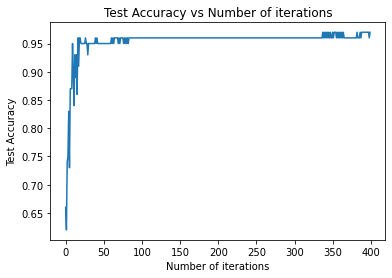

In [ ]:
t = np.arange(400)
plt.plot(t, pred_acc)
plt.xlabel('Number of iterations')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs Number of iterations')
plt.show()

<h2><font color='blue'> AdaBoost using sklearn</font></h2>


In this section, we will implement AdaBoost using sklearn library. We will first import AdaBoostClassifier and metrics from the sklearn library

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

The train and test data is already loaded in the Adaboost class, so we will just copy them here.

In [ ]:
X_train = adaboost.train_data
y_train = adaboost.train_labels
X_test = adaboost.test_data
y_test = adaboost.test_labels

Now, we will create our AdaBoostClassifier and fit it to the training data. The AdaBoostClassifier in Sklearn has  a parameter "base_estimator", this is base estimator(weak classifier) from which the boosted ensemble is built. If None, then the base estimator is DecisionTreeClassifier initialized with max_depth=1 which is equivalent to a decision stump. So, in the following code, we use the default value of base estimator.

In [ ]:
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1)
# Training Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predicting the response for test dataset
y_pred = model.predict(X_test)

In [ ]:
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.97


We observe that we obtain 97% accuracy on test data usinf sklearn as well. Now, let's discuss a few advantages and disadvantages of using AdaBoost.

<h2><font color='blue'> Summary</font></h2>

In this tutorial, we discussed about AdaBoost. We started with where it can be useful, we then discussed about ensembles and it's various types to make sure that you understand where AdaBoost falls exactly. We then talked about the AdaBoost algorithm in detail, it's pseudo code and then implemented the AdaBoost algorithm from scratch using numpy library. We also implemented an AdaBoost classifier using Sklearn library. AdaBoost is like a boon to improve the accuracy of any classification algorithms if used accurately. I hope you find this tutorial useful. If you interested in reading more on this topic, I am sharing some interesting videos and articles in the next section. Do check them out!

<h2><font color='blue'> Additional Resouces on AdaBoost</font></h2>

*   Original research paper : [A Short Introduction to Boosting](https://cseweb.ucsd.edu/~yfreund/papers/IntroToBoosting.pdf)
*   Adaboost video: [Adaboost clearly explained](https://www.youtube.com/watch?v=LsK-xG1cLYA)
*   [Sklearn Adaboost](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)


